## Customer Satisfaction Analysis
This task involves analyzing customer satisfaction based on user engagement and experience analyses 

1. Assigning engagement and experience scores to each user
2. Calculating a satisfaction score
3. Building a regression model to predict satisfaction scores
4. Clustering users based on engagement and experience scores
5. Aggregating satisfaction and experience scores per cluster

In [1]:
## Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
# import script module 
from scripts.satisfaction_analysis import *
from scripts.experience_analytics import aggregate_customer_data, perform_kmeans_clustering as experience_cluster
from scripts.user_engagement import aggregate_metrics_per_customer, normalize_and_cluster as engagement_cluster

In [3]:
# Load the preprocessed data
df = pd.read_csv('../data/cleaned_telecom_data.csv')

sample df stasts

In [4]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,244912.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,244912.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,244912.0,2.082008e+14,3.373456e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,244912.0,2.082014e+14,3.373456e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,244912.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,99572.128983,2.082015e+14,3.366999e+10,4.847455e+13,72.862020,12.037797,11112.355328,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112120e+07,4.546434e+08
std,2.883600e+18,288.610872,288.096693,59084.184127,3.925668e+08,3.532589e+07,2.237359e+13,51.361714,11.040917,17189.349903,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.126923e+07,2.441421e+08
min,6.917538e+18,0.000000,0.000000,7142.000000,2.082008e+14,3.360168e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,9.503716e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,57442.000000,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08
50%,7.349883e+18,499.000000,500.000000,86399.000000,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,1.304243e+19,749.000000,750.000000,132430.000000,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08
max,1.318654e+19,999.000000,999.000000,244912.000000,2.082023e+14,3.373456e+10,9.900120e+13,221.989265,39.657207,49210.500000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.275255e+07,9.029696e+08


In [7]:
print(df.isnull().sum())

Bearer Id                                   0
Start                                       1
Start ms                                    0
End                                         1
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

### Engagement and and Experience Data

In [8]:
# # Engagement analysis
engagement_data, _ = aggregate_metrics_per_customer(df)
engagement_normalized, engagement_kmeans = engagement_cluster(engagement_data)

In [9]:
# # Experience analysis
experience_data = aggregate_customer_data(df)
experience_data, experience_kmeans = experience_cluster(experience_data)

In [10]:
# check shape of engagmeent_data and experience_data 
print(f"Engagement data shape: {engagement_data.shape}")
print(f"Experience data shape: {experience_data.shape}")

Engagement data shape: (90038, 6)
Experience data shape: (90038, 11)


### check if both data are aligned with MSISDN

In [11]:
engagement_data.head()

,MSISDN,Sessions,Duration,DL Traffic,UL Traffic,Total Traffic
0,3.360168e+10,359,34112179.0,1.682756e+11,1.467565e+10,1.829512e+11
1,3.360171e+10,1,38503.0,2.934050e+08,4.621197e+07,3.396170e+08
2,3.360171e+10,1,52478.0,8.621012e+08,3.850972e+07,9.006109e+08
3,3.360171e+10,2,120298.0,1.498037e+09,8.929984e+07,1.587337e+09
4,3.360171e+10,1,176022.0,1.333844e+08,4.494626e+07,1.783307e+08


In [12]:
experience_data.head()

,Avg TCP Retrans DL,Avg TCP Retrans UL,Avg RTT DL,Avg RTT UL,Handset Type,Avg Throughput DL,Avg Throughput UL,Avg TCP Retrans,Avg RTT,Avg Throughput,Cluster
MSISDN/Number,,,,,,,,,,,
3.360168e+10,1.493360e+07,575766.310927,66.991436,8.645259,Apple iPhone 7 (A1778),9263.906685,532.103064,7.754682e+06,37.818348,4898.004875,2
3.360171e+10,2.042108e+07,750467.119262,110.000000,5.000000,Apple iPhone Se (A1723),23.000000,47.000000,1.058577e+07,57.500000,35.000000,1
3.360171e+10,5.751940e+05,44040.000000,145.000000,7.000000,Apple iPhone 6 (A1586),7677.000000,2115.000000,3.096170e+05,76.000000,4896.000000,1
3.360171e+10,1.778695e+07,437307.059631,104.397853,18.831441,Samsung Galaxy S8 Plus (Sm-G955F),24626.750000,676.500000,9.112128e+06,61.614647,12651.625000,1
3.360171e+10,2.042108e+07,750467.119262,29.000000,5.000000,Apple iPhone 7 Plus (A1784),63.000000,54.000000,1.058577e+07,17.000000,58.500000,2


In [13]:
# engagement and experience features 
engagement_features = ['Sessions', 'Duration', 'Total Traffic']
experience_features = ['Avg TCP Retrans', 'Avg RTT', 'Avg Throughput']

In [14]:
# Normalize the data for clustering
scaler = StandardScaler()
engagement_normalized = scaler.fit_transform(engagement_data[engagement_features])
experience_normalized = scaler.fit_transform(experience_data[experience_features])

In [15]:
# Create and fit KMeans models
engagement_kmeans = KMeans(n_clusters=3, random_state=42)
engagement_kmeans.fit(engagement_normalized)

experience_kmeans = KMeans(n_clusters=3, random_state=42)
experience_kmeans.fit(experience_normalized)

KMeans(n_clusters=3, random_state=42)

### Assign Engagement and Experience Scores
- engagement score - Euclidean distance between the user data point & the less engaged cluster
- experience score - Euclidean distance between the user data point & the worst experience cluster.

In [16]:
msisdn_column = df['MSISDN/Number']  

engagement_data = engagement_data.reset_index(drop=True)
experience_data = experience_data.reset_index(drop=True)

In [17]:
scores_df = assign_scores(engagement_data[engagement_features], 
                          experience_data[experience_features], 
                          engagement_kmeans, experience_kmeans,
                          msisdn_column)

scores_df

,MSISDN,Engagement Score,Experience Score
0,3.366496e+10,7.588372,0.885232
1,3.368185e+10,0.015863,1.255845
2,3.373456e+10,0.012770,2.850231
3,3.369980e+10,0.023707,2.041430
4,3.366819e+10,0.014416,0.257769
...,...,...,...
90033,3.364566e+10,0.007184,1.478036
90034,3.366865e+10,0.016822,3.807889
90035,3.365069e+10,0.011409,2.105474
90036,3.362189e+10,0.012835,1.478036


### Calculate Satisfaction Scores
By Considering the average of both engagement & experience scores as the satisfaction score & calculating  the top 10 satisfied customer

In [18]:
scores_df, top_10_satisfied = calculate_satisfaction_scores(scores_df)
print("Top 10 Satisfied Customers:")
top_10_satisfied

Top 10 Satisfied Customers:


,MSISDN,Engagement Score,Experience Score,Satisfaction Score
90037,3.361962e+10,519.628708,1.162839,260.395773
0,3.366496e+10,7.588372,0.885232,4.236802
56917,3.366284e+10,0.016137,5.937214,2.976676
60709,3.362161e+10,0.011406,5.937214,2.974310
56533,3.365809e+10,0.011266,5.937214,2.974240
30065,3.365887e+10,0.011152,5.937214,2.974183
70943,3.366169e+10,0.008085,5.923897,2.965991
61655,3.368175e+10,0.012139,5.903265,2.957702
72238,3.364367e+10,0.014071,5.882815,2.948443
44061,3.366526e+10,0.008039,5.875631,2.941835


### Build Regression Model
linear regression model to predict satisfaction scores based on engagement and experience scores. 
- It returns Mean Squared Error (MSE) and R-squared (R²) Score

In [19]:
model, mse, r2 = build_regression_model(scores_df)
print(f"Model MSE: {mse}")
print(f"Model R2 Score: {r2}")

Model MSE: 5.0244428689023316e-29
Model R2 Score: 1.0


###  K-means Clustering and Score Aggregation
- k-means (k=2) clusteting on the engagement & the experience score.
- Aggregate the average satisfaction & experience score per cluster.

Average Satisfaction Scores per Cluster: [0.8138807221309855, 260.3957734980878]
Average Experience Scores per Cluster: [1.611443461178693, 1.1628392471770288]


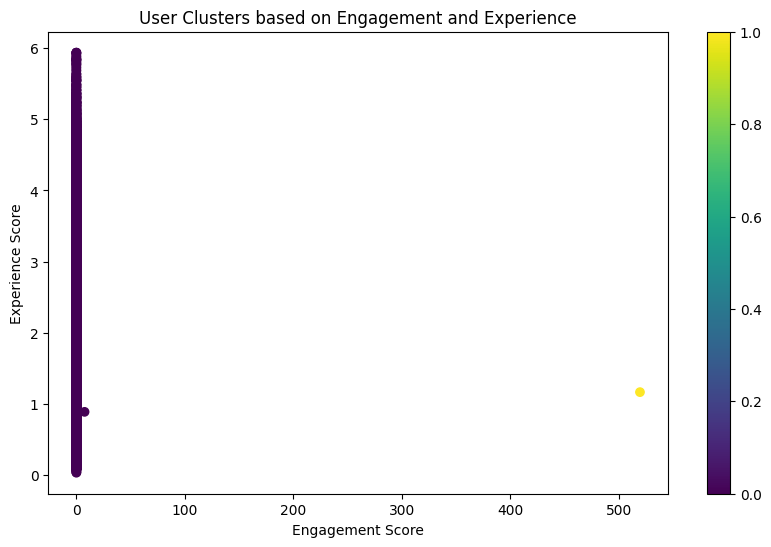

In [20]:
clustered_df, avg_satisfaction, avg_experience = cluster_satisfaction(scores_df)
print(f"Average Satisfaction Scores per Cluster: {avg_satisfaction}")
print(f"Average Experience Scores per Cluster: {avg_experience}")

fig = plot_clusters(clustered_df)
plt.show()

### Export to MySQL Database
- Exporting the final final table containing all user ID + engagement, experience & satisfaction scores in local MySQL database.

In [21]:
export_to_mysql(scores_df, "telecom_database", "satisfaction_table")

### Read the satisfaction table from MySQL

In [22]:
# read from mysql 
df_from_mysql = read_from_mysql("telecom_database", "satisfaction_table")

if df_from_mysql is not None:
    print("Data read from MySQL:")
    print(df_from_mysql)
    print(f"Shape of the data: {df_from_mysql.shape}")
else:
    print("Failed to read data from MySQL.")

Data read from MySQL:
              MSISDN  Engagement_Score  Experience_Score  Satisfaction_Score
0      33664962239.0          7.588370          0.885232            4.236800
1      33681854413.0          0.015863          1.255850            0.635854
2      33734564203.5          0.012771          2.850230            1.431500
3      33699795932.0          0.023707          2.041430            1.032570
4      33668185951.0          0.014416          0.257769            0.136092
...              ...               ...               ...                 ...
90033  33645655643.0          0.007184          1.478040            0.742610
90034  33668648496.0          0.016822          3.807890            1.912360
90035  33650688697.0          0.011409          2.105470            1.058440
90036  33621890103.0          0.012835          1.478040            0.745435
90037  33619622058.0        519.629000          1.162840          260.396000

[90038 rows x 4 columns]
Shape of the data: (90038, 4